<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/occupacny/test_1227.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tslearn
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 6.5 MB/s 


In [2]:
data = pd.read_csv("/content/Time use survey_Korea_2019.csv", encoding="cp949")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
test = data.iloc[:,12:]

In [16]:
# Extract the row index containing code:02 in the data
# code:02 means that the surveyor was at work.
index_list = []

for i in range(0, test.shape[0]) : 
    for k in range(0, test.shape[1]) :     
        a = str(test.iloc[int(i), int(k)])
        
        if a[4:6] == '02' :            
            index_list.append(i)
            
        else : pass

In [21]:
# remove duplicate list
w_index = []

for i in index_list:
  if i not in w_index:
    w_index.append(i)

print(w_index)

[0, 1, 3, 4, 5, 6, 10, 11, 19, 21, 22, 23, 26, 27, 29, 30, 31, 39, 49, 50, 51, 64, 66, 71, 76, 77, 80, 81, 82, 83, 84, 85, 92, 94, 95, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 114, 115, 118, 120, 121, 126, 134, 135, 140, 142, 149, 150, 151, 155, 157, 160, 161, 162, 163, 166, 167, 176, 177, 178, 179, 180, 181, 184, 185, 200, 201, 202, 208, 209, 211, 212, 224, 225, 228, 230, 231, 232, 233, 236, 238, 242, 243, 244, 250, 251, 253, 254, 255, 257, 259, 262, 266, 267, 288, 289, 292, 293, 296, 297, 298, 299, 302, 303, 310, 311, 312, 318, 323, 325, 329, 335, 338, 339, 340, 341, 343, 344, 345, 346, 348, 349, 352, 353, 354, 355, 358, 359, 360, 361, 364, 365, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 388, 389, 393, 394, 395, 399, 401, 414, 415, 416, 417, 418, 423, 424, 425, 430, 432, 433, 434, 436, 440, 441, 448, 449, 452, 453, 454, 456, 457, 462, 463, 464, 465, 468, 469, 477, 478, 479, 480, 481, 482, 483, 495, 499, 500, 501, 503, 506, 507, 508, 509, 514, 515, 522, 525, 526, 527, 528,

In [22]:
df = pd.read_excel('/content/Time use survey_Korea_2019_onehot_only.xlsx')

In [23]:
df_w = pd.read_csv('/content/2019_시간대_전체_20221226_91579.csv', encoding = 'cp949')

In [26]:
df = df.drop(['Unnamed: 0'], axis=1)

In [27]:
df_w_list = df_w.loc[w_index]

In [28]:
df_w

,회차,평토일구분코드,연령코드,경제활동상태코드,취업형태코드
0,5,1,1,NaN,NaN
1,5,1,1,NaN,NaN
2,5,1,1,NaN,NaN
3,5,1,1,NaN,NaN
4,5,1,1,NaN,NaN
...,...,...,...,...,...
52177,7,3,6,3.0,NaN
52178,7,3,6,3.0,NaN
52179,7,3,6,3.0,NaN
52180,7,3,6,3.0,NaN


In [29]:
print(df_w_list['연령코드'].value_counts())
print('-----'*5)
print(df_w_list['평토일구분코드'].value_counts())

6    5832
5    3279
4    3244
3    2557
1    2130
2    2119
Name: 연령코드, dtype: int64
-------------------------
1    11729
3     3780
2     3652
Name: 평토일구분코드, dtype: int64


In [34]:
list_age1 = df_w_list.index[(df_w_list['연령코드'] == 1)].tolist()

In [35]:
df_age1 = df.loc[list_age1]

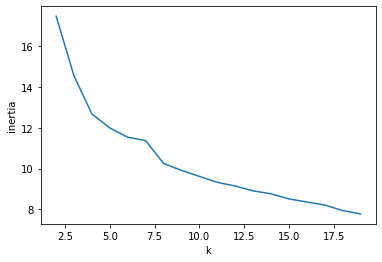

In [37]:
inertia = []

for k in range(2, 20):
  km = TimeSeriesKMeans(n_clusters=k, random_state=42, metric="euclidean", max_iter=2, n_jobs=-1)
  km.fit(df_age1)
  inertia.append(km.inertia_)

plt.plot(range(2, 20), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [38]:
# cluster labels 
tkm = TimeSeriesKMeans(n_clusters=3, random_state=42, metric="euclidean", max_iter=2, n_jobs=-1)
cluster5 = tkm.fit(df_age1)
df_age1['cluster'] = cluster5.labels_
df_age1.head()

,(주행동시간대) 오전 00:00,(주행동시간대) 오전 00:10,(주행동시간대) 오전 00:20,(주행동시간대) 오전 00:30,(주행동시간대) 오전 00:40,(주행동시간대) 오전 00:50,(주행동시간대) 오전 01:00,(주행동시간대) 오전 01:10,(주행동시간대) 오전 01:20,(주행동시간대) 오전 01:30,...,(주행동시간대) 오후 10:30,(주행동시간대) 오후 10:40,(주행동시간대) 오후 10:50,(주행동시간대) 오후 11:00,(주행동시간대) 오후 11:10,(주행동시간대) 오후 11:20,(주행동시간대) 오후 11:30,(주행동시간대) 오후 11:40,(주행동시간대) 오후 11:50,cluster
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [42]:
df_age1_0 = df_age1[df_age1['cluster'] == 0]
df_age1_0 = df_age1_0.drop(['cluster'], axis=1)
df_age1_0_rate = df_age1_0.sum(axis=0) / len(df_age1_0)

df_age1_1 = df_age1[df_age1['cluster'] == 1]
df_age1_1 = df_age1_1.drop(['cluster'], axis=1)
df_age1_1_rate = df_age1_1.sum(axis=0) / len(df_age1_1)

df_age1_2 = df_age1[df_age1['cluster'] == 2]
df_age1_2 = df_age1_2.drop(['cluster'], axis=1)
df_age1_2_rate = df_age1_2.sum(axis=0) / len(df_age1_2)

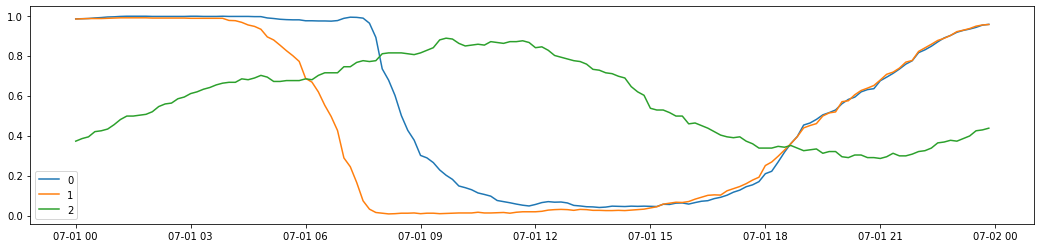

In [43]:
ts = pd.date_range('2019-07-01 00:00:00', '2019-07-01 23:50:00', freq='10min')
plt.figure(figsize=(18,4))

plt.plot(ts, df_age1_0_rate)
plt.plot(ts, df_age1_1_rate)
plt.plot(ts, df_age1_2_rate)

plt.legend(labels=['0','1','2'])
plt.show()

In [44]:
list_age6 = df_w_list.index[(df_w_list['연령코드'] == 6)].tolist()
df_age6 = df.loc[list_age6]

In [49]:
dt_w_list6 = df_w_list[(df_w_list['연령코드'] == 6)]

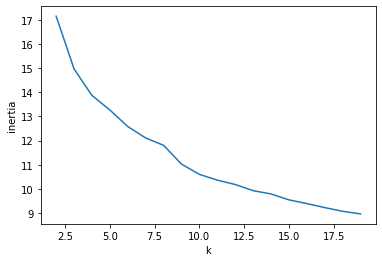

In [45]:
inertia = []

for k in range(2, 20):
  km = TimeSeriesKMeans(n_clusters=k, random_state=42, metric="euclidean", max_iter=2, n_jobs=-1)
  km.fit(df_age6)
  inertia.append(km.inertia_)

plt.plot(range(2, 20), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [46]:
# cluster labels 
tkm = TimeSeriesKMeans(n_clusters=8, random_state=42, metric="euclidean", max_iter=2, n_jobs=-1)
cluster5 = tkm.fit(df_age6)
df_age6['cluster'] = cluster5.labels_

In [47]:
df_age6_0 = df_age6[df_age6['cluster'] == 0]
df_age6_0 = df_age6_0.drop(['cluster'], axis=1)
df_age6_0_rate = df_age6_0.sum(axis=0) / len(df_age6_0)

df_age6_1 = df_age6[df_age6['cluster'] == 1]
df_age6_1 = df_age6_1.drop(['cluster'], axis=1)
df_age6_1_rate = df_age6_1.sum(axis=0) / len(df_age6_1)

df_age6_2 = df_age6[df_age6['cluster'] == 2]
df_age6_2 = df_age6_2.drop(['cluster'], axis=1)
df_age6_2_rate = df_age6_2.sum(axis=0) / len(df_age6_2)

df_age6_3 = df_age6[df_age6['cluster'] == 3]
df_age6_3 = df_age6_3.drop(['cluster'], axis=1)
df_age6_3_rate = df_age6_3.sum(axis=0) / len(df_age6_3)

df_age6_4 = df_age6[df_age6['cluster'] == 4]
df_age6_4 = df_age6_4.drop(['cluster'], axis=1)
df_age6_4_rate = df_age6_4.sum(axis=0) / len(df_age6_4)

df_age6_5 = df_age6[df_age6['cluster'] == 5]
df_age6_5 = df_age6_5.drop(['cluster'], axis=1)
df_age6_5_rate = df_age6_5.sum(axis=0) / len(df_age6_5)

df_age6_6 = df_age6[df_age6['cluster'] == 6]
df_age6_6 = df_age6_6.drop(['cluster'], axis=1)
df_age6_6_rate = df_age6_6.sum(axis=0) / len(df_age6_6)

df_age6_7 = df_age6[df_age6['cluster'] == 7]
df_age6_7 = df_age6_7.drop(['cluster'], axis=1)
df_age6_7_rate = df_age6_7.sum(axis=0) / len(df_age6_7)

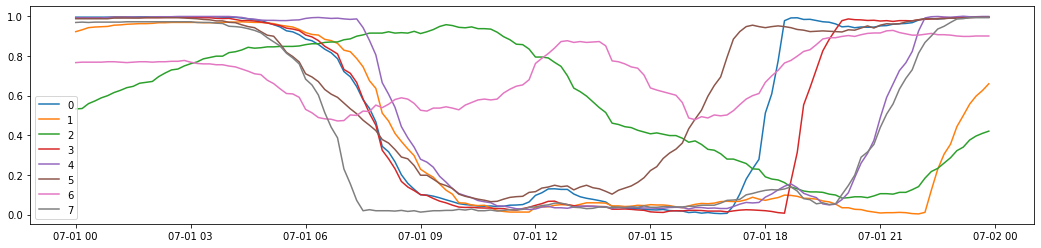

In [48]:
plt.figure(figsize=(18,4))

plt.plot(ts, df_age6_0_rate)
plt.plot(ts, df_age6_1_rate)
plt.plot(ts, df_age6_2_rate)
plt.plot(ts, df_age6_3_rate)
plt.plot(ts, df_age6_4_rate)
plt.plot(ts, df_age6_5_rate)
plt.plot(ts, df_age6_6_rate)
plt.plot(ts, df_age6_7_rate)

plt.legend(labels=['0','1','2','3','4','5','6','7'])
plt.show()

In [57]:
list_age6_2 = df_age6_2.index.tolist()
dt_w_list6_2 = df_w_list.loc[list_age6_2]
dt_w_list6_2

,회차,평토일구분코드,연령코드,경제활동상태코드,취업형태코드
6480,5,1,6,1.0,NaN
6481,5,1,6,1.0,NaN
6550,5,1,6,1.0,NaN
6551,5,1,6,1.0,NaN
6633,5,1,6,1.0,NaN
...,...,...,...,...,...
51987,7,3,6,3.0,NaN
52000,7,3,6,3.0,NaN
52001,7,3,6,3.0,NaN
52034,7,3,6,3.0,NaN


In [58]:
print(dt_w_list6_2['평토일구분코드'].value_counts())

1    298
2     84
3     65
Name: 평토일구분코드, dtype: int64
